#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading excel file

In [2]:
data = pd.read_excel('1673873196_hr_comma_sep.xlsx')

In [3]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Perform steps

1. Perform data quality check by checking for missing values if any.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

- No missing values in the dataset

2.	Understand what factors contributed most to employee turnover by EDA.
    2.1.	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.<br>
    2.2.	Draw the distribution plot of <br>
        ■	Employee Satisfaction (use column satisfaction_level)<br>
        ■	Employee Evaluation (use column last_evaluation)<br>
        ■	Employee Average Monthly Hours (use column average_montly_hours)<br>
    2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.


In [6]:
# Heatmap of the Correlation Matrix

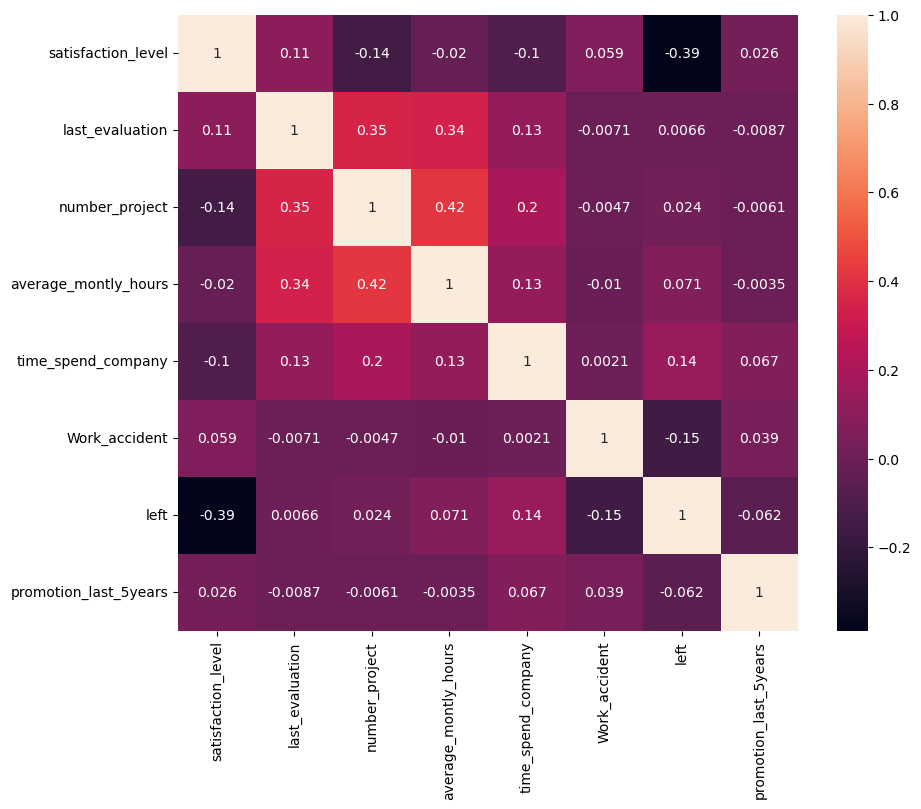

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [14]:
# Distribution Plot
     #Employee Satisfaction
     #   ■Employee Evaluation
     #   ■Employee Average Monthly Hours 

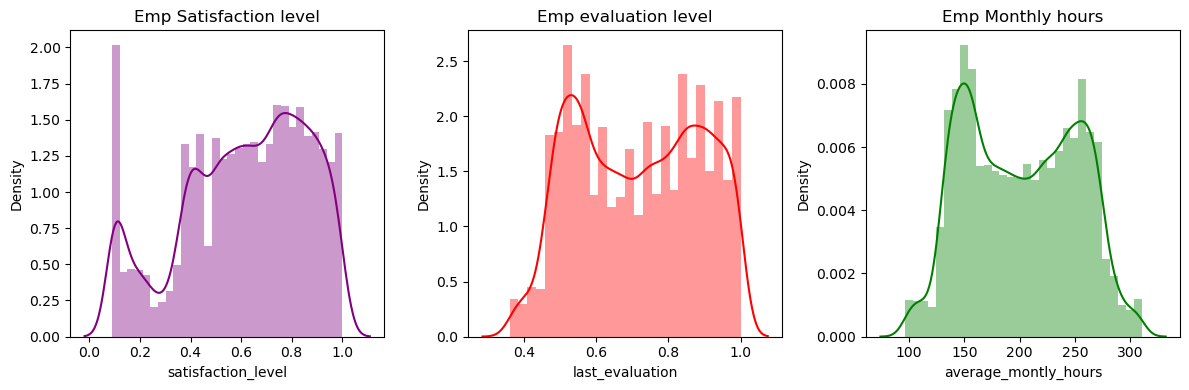

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.distplot(data['satisfaction_level'],kde=True,color='purple')
plt.title('Emp Satisfaction level')


plt.subplot(1,3,2)
sns.distplot(data['last_evaluation'],kde=True,color='red')
plt.title('Emp evaluation level')

plt.subplot(1,3,3)
sns.distplot(data['average_montly_hours'],kde=True,color='green')
plt.title('Emp Monthly hours')

plt.tight_layout()
plt.show()

- For more clear visualization, I am using Histogram plot

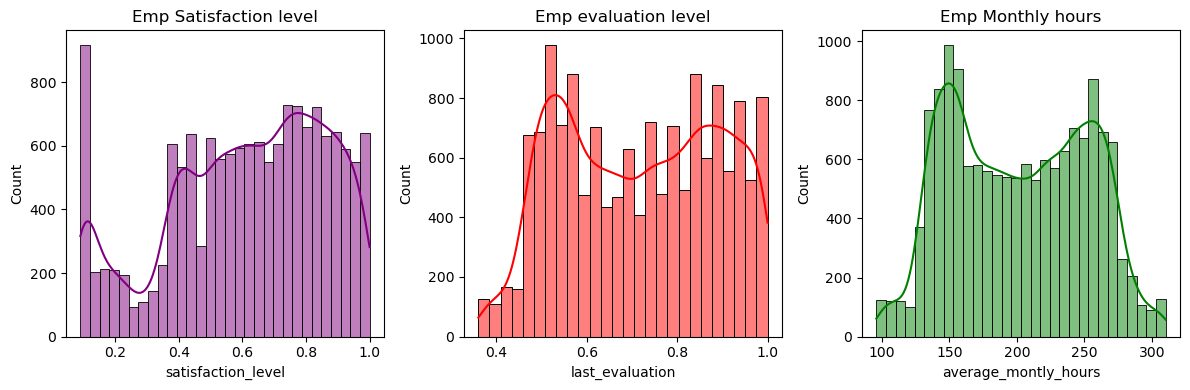

In [13]:
# Histplot for data visualization

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(data['satisfaction_level'],kde=True,color='purple')
plt.title('Emp Satisfaction level')


plt.subplot(1,3,2)
sns.histplot(data['last_evaluation'],kde=True,color='red')
plt.title('Emp evaluation level')

plt.subplot(1,3,3)
sns.histplot(data['average_montly_hours'],kde=True,color='green')
plt.title('Emp Monthly hours')

plt.tight_layout()
plt.show()

In [16]:
# Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization
# (use column number_project and hue column left)  and give your inferences from the plot.

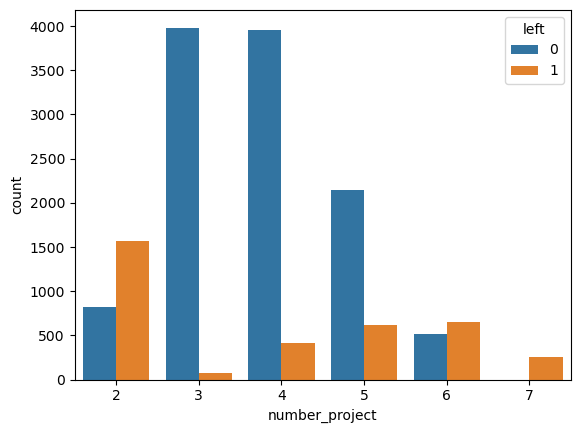

In [21]:
# Employee who left and stayed based on Number of Project

sns.countplot(x=data['number_project'],hue='left',data=data)
plt.show()

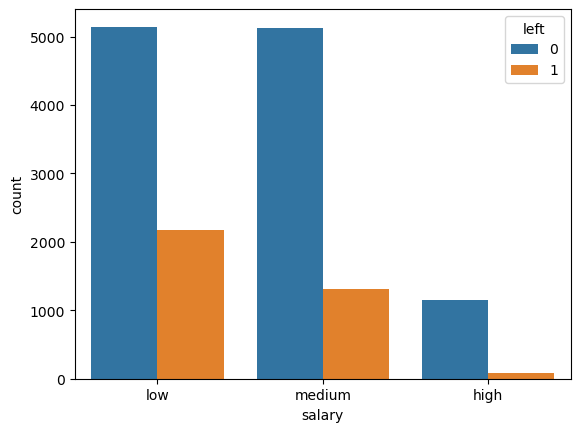

In [18]:
# Employee who left and stayed based on Salary

sns.countplot(x=data['salary'],hue='left',data=data)
plt.show()

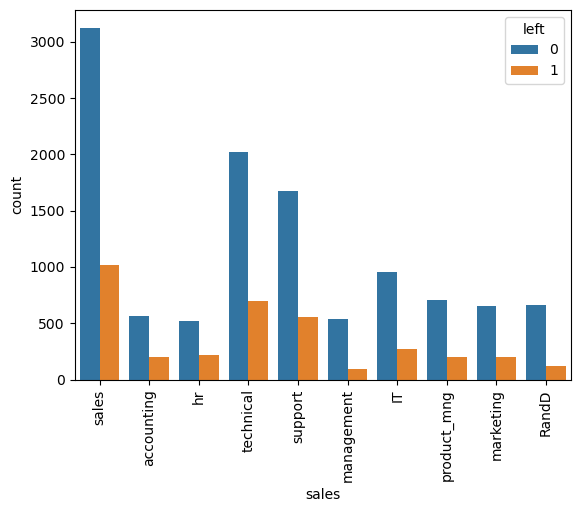

In [23]:
# Employee who left and stayed based on Sales

sns.countplot(x=data['sales'],hue='left',data=data)
plt.xticks(rotation=90)
plt.show()

3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
    3.1.Choose columns satisfaction_level, last_evaluation and left.<br>
    3.2.Do KMeans clustering of employees who left the company into 3 clusters.<br>
    3.3.Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.


In [24]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [25]:
# Choose columns satisfaction_level, last_evaluation and left

In [26]:
cluster_data = data[['satisfaction_level', 'last_evaluation','left']]
left_emp_data = cluster_data[cluster_data['left'] == 1]

left_emp_data.head(10)

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
5,0.41,0.50,1
6,0.10,0.77,1
7,0.92,0.85,1
8,0.89,1.00,1
9,0.42,0.53,1


In [27]:
left_emp_data.shape
        # checking the total number of rows and cols in left_emp_data

(3571, 3)

In [35]:
# Do KMeans clustering of employees who left the company into 3 clusters.

In [28]:
from sklearn.cluster import KMeans

In [29]:

kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(left_emp_data)

KMeans(n_clusters=3, random_state=42)

In [30]:
left_emp_data['cluster']=kmeans.labels_

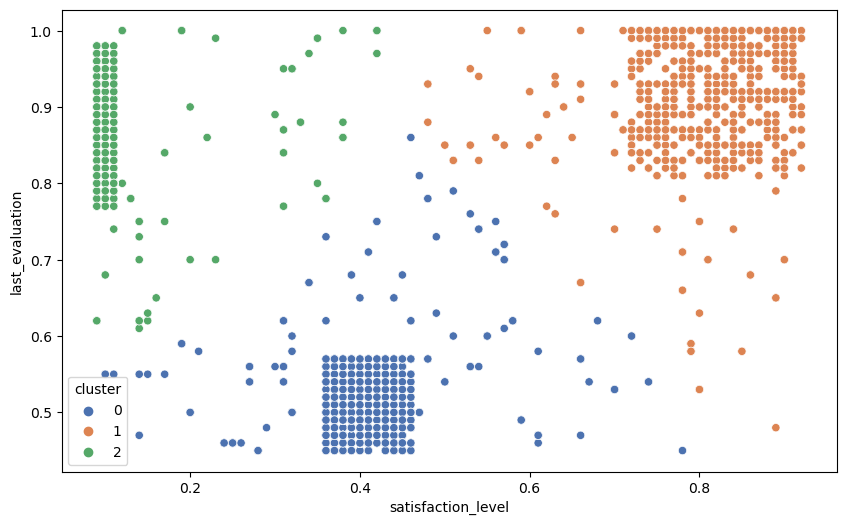

In [37]:
# Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

plt.figure(figsize=(10,6))
sns.scatterplot(x='satisfaction_level',y='last_evaluation',hue='cluster',palette='deep', data=left_emp_data)
plt.show()

- Employee left based on High Evaluation and Low Satisfaction level
- Employee left based on Low Evaluation and Average Satisfaction level
- Employee left based on High Evaluation and High Satisfaction level

In [34]:
left_emp_data['cluster'].value_counts()
        # To show the the number of Employee left based on cluster

0    1650
1     977
2     944
Name: cluster, dtype: int64

4. Handle the left Class Imbalance using SMOTE technique<br>
    4.1.Pre-Process the data by converting categorical columns to numerical columns by <br>
        ■Separating categorical variables and numeric variables.<br>
        ■Applying get_dummies() to the categorical variables.<br>
        ■Combining categorical variables and numeric variables.<br>
    4.2.Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.<br>
    4.3.Upsample the train dataset using SMOTE technique from the imblearn module.<br>


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [41]:
# ■	Separating categorical variables and numeric variables

df_numerical = data.select_dtypes(include=['int64','float64'])
df_categorical = data.select_dtypes(include=['object'])

df_categorical.head(10)

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
5,sales,low
6,sales,low
7,sales,low
8,sales,low
9,sales,low


In [42]:
# Applying get_dummies() to the categorical variables.

df_converted=pd.get_dummies(data=df_categorical)

In [43]:
df_converted.head(10)

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,1,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0,0,0,1,0
8,0,0,0,0,0,0,0,1,0,0,0,1,0
9,0,0,0,0,0,0,0,1,0,0,0,1,0


In [44]:
# Combining categorical variables and numeric variables

df_new=pd.concat([df_numerical,df_converted],axis=1)
df_new.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
# Handling class Imbalance technique

df_new['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [46]:
X = df_new.drop('left',axis=1)
Y = df_new['left']

In [48]:
# Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8, random_state=123)

In [58]:
# Upsample the train dataset using SMOTE technique from the imblearn module.

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_resample,Y_train_resample = sm.fit_resample(X_train,Y_train)

In [57]:
Y_train_resample.value_counts()
    # checking the final values of Y_training set

0    9137
1    9137
Name: left, dtype: int64

5. Perform 5-Fold cross-validation model training and evaluate performance. <br>
    5.1. Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.<br>
    5.2. Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.<br>
    5.3. Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.


6. Identify the best model and justify the evaluation metrics used. <br>
    6.1. Find the ROC/AUC for each model and plot the ROC curve.<br>
    6.2. Find the confusion matrix for each of the models.<br>
    6.3. From the confusion matrix, explain which metric needs to be used- Recall or Precision?


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report, confusion_matrix

In [105]:
# Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report, roc auc and cross-validation scrore

log_reg = LogisticRegression()
log_reg.fit(X_train_resample,Y_train_resample)


LogisticRegression()

In [106]:
y_pred1 = log_reg.predict(X_test)

In [64]:
print('Accuracy score: ',accuracy_score(Y_test,y_pred1))

Accuracy score:  0.7616666666666667


- Here, accuracy score is 76.16%

In [65]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2291
           1       0.50      0.77      0.60       709

    accuracy                           0.76      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.76      0.78      3000



In [69]:
print(confusion_matrix(Y_test, y_pred1))

[[1742  549]
 [ 166  543]]


In [71]:
print(cross_val_score(log_reg,X_train_resample,Y_train_resample).mean())

0.7988404065181272


In [72]:
print(roc_auc_score(Y_test,y_pred1))

0.7631170355084193


In [73]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred1)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)

[0.         0.23963335 1.        ]
[0.         0.76586742 1.        ]
[2 1 0]


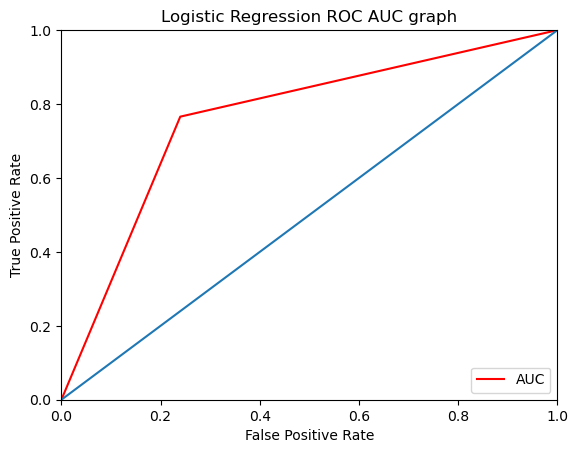

In [80]:
# Plot ROC AUC graph for Logistic Regression

plt.title('Logistic Regression ROC AUC graph')
plt.plot(fpr, tpr, 'r', label = 'AUC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
# Train a Random Forest Classifier model and apply a 5-Fold CV and plot the classification report, roc auc and cross-validation scrore

from sklearn.ensemble import RandomForestClassifier

In [83]:
random_forest=RandomForestClassifier(max_depth=5)

In [103]:
random_forest.fit(X_train_resample,Y_train_resample)


RandomForestClassifier(max_depth=5)

In [104]:
y_pred = random_forest.predict(X_test)

In [87]:
print('Accuracy score',accuracy_score(Y_test,y_pred))

Accuracy score 0.9573333333333334


In [96]:
print(cross_val_score(random_forest,X_train_resample,Y_train_resample).mean())

0.9477399877352705


In [95]:
print(confusion_matrix(Y_test, y_pred))

[[2218   73]
 [  55  654]]


In [88]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2291
           1       0.90      0.92      0.91       709

    accuracy                           0.96      3000
   macro avg       0.94      0.95      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [90]:
print(roc_auc_score(Y_test,y_pred))

0.9452810685585774


In [91]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)

[0.         0.03186381 1.        ]
[0.         0.92242595 1.        ]
[2 1 0]


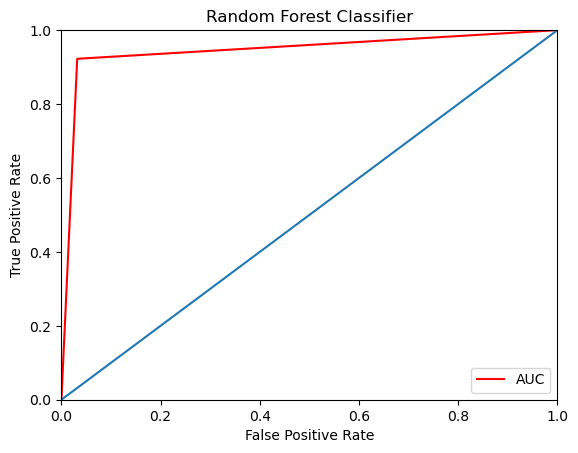

In [94]:
# Plot ROC AUC graph for Random Forest Classifier

plt.title('Random Forest Classifier')
plt.plot(fpr, tpr, 'r', label = 'AUC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
# Train a Gradient Boosting Classifier model and apply a 5-Fold CV and plot the classification report, roc auc and cross-validation scrore

from sklearn.ensemble import GradientBoostingClassifier

In [99]:
gradient_boost = GradientBoostingClassifier()

In [101]:
gradient_boost.fit(X_train_resample,Y_train_resample)


GradientBoostingClassifier()

In [102]:
y_pred2 = gradient_boost.predict(X_test)

In [107]:
print('Accuracy score',accuracy_score(Y_test,y_pred2))

Accuracy score 0.964


In [108]:
print(classification_report(Y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2291
           1       0.91      0.94      0.92       709

    accuracy                           0.96      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



In [109]:
print(roc_auc_score(Y_test,y_pred2))

0.9550026811235971


In [110]:
print(confusion_matrix(Y_test, y_pred2))

[[2227   64]
 [  44  665]]


In [111]:
print(cross_val_score(gradient_boost,X_train_resample,Y_train_resample).mean())

0.9587938933926953


In [112]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred2)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)

[0.        0.0279354 1.       ]
[0.         0.93794076 1.        ]
[2 1 0]


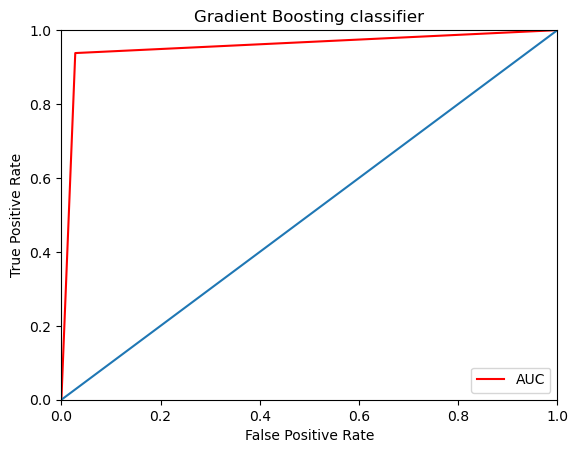

In [113]:
plt.title('Gradient Boosting classifier')
plt.plot(fpr, tpr, 'r', label = 'AUC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- Here, the best fit models were Random Forest and Gradient Boosting classifiers

7. Suggest various retention strategies for targeted employees. <br>
    7.1.Using the best model, predict the probability of employee turnover in the test data.<br>
    7.2.Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.<br>
    ■Safe Zone (Green) (Score < 20%)<br>
    ■Low Risk Zone (Yellow) (20% < Score < 60%)<br>
    ■Medium Risk Zone (Orange) (60% < Score < 90%)<br>
    ■High Risk Zone (Red) (Score > 90%).


In [114]:
# Using XGBoost boosting classifier model

import xgboost as xgb
model = xgb.XGBClassifier()

In [116]:
model.fit(X_train_resample,Y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [117]:
y_pred3 = model.predict(X_test)

In [118]:
print('Accuracy score',accuracy_score(Y_test,y_pred3))

Accuracy score 0.9826666666666667


In [119]:
predicted_prob = model.predict_proba(X_test)

In [120]:
predicted_prob[:,1]

array([1.0655432e-03, 4.4659537e-04, 4.6851885e-05, ..., 9.8639083e-01,
       4.3727891e-03, 5.5505626e-04], dtype=float32)

In [126]:
# Using the best model, predict the probability of employee turnover in the test data

X_test['leave']=y_pred3
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,...,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,leave
6958,0.54,0.67,3,154,2,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7534,0.72,0.52,3,143,4,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2975,0.95,0.61,3,267,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3903,0.78,0.79,3,203,2,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8437,0.60,0.40,3,146,4,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,0.42,0.55,2,148,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
10593,0.61,0.67,4,151,3,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12248,0.87,0.91,4,228,5,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3147,0.49,0.71,3,154,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [121]:
# Based on the below probability score range, categorize the employees into four zones 
# suggest your thoughts on the retention strategies for each zone

zone=[]
prob=[]


for i in predicted_prob[:,1]:
  prob.append(i)
  if (i<=0.2):
    zone.append("Safe Zone")
  elif (i>0.2 and i<=0.6):
    zone.append("Low Risk Zone")
  elif (i>0.6 and i<=0.9):
    zone.append("Medium Risk Zone ")
  else:
    zone.append("High Risk Zone ")

In [122]:
categories = ["Safe Zone","Low Risk Zone","Medium Risk Zone ","High Risk Zone "]
color = ["Green","Yellow","Orange","Red"]

In [123]:
colordict = dict(zip(categories, color))

clr = pd.DataFrame({"zone":zone,"probability":prob})
clr["Color"] = clr["zone"].apply(lambda x: colordict[x])
clr['zone'] = clr['zone'].astype(str)

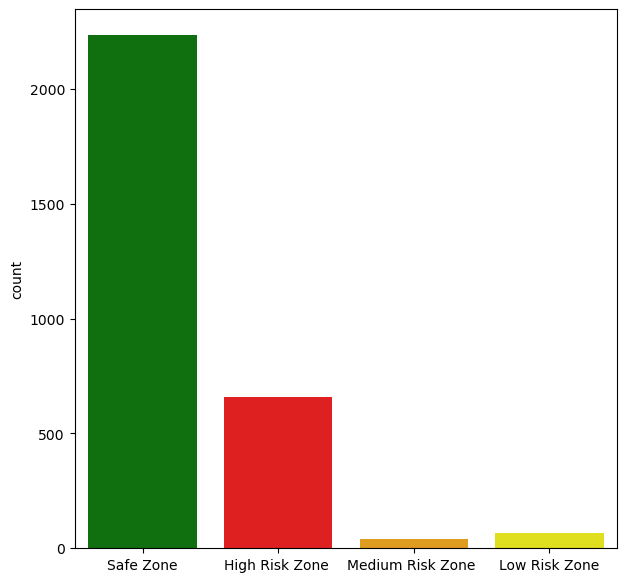

In [131]:
color= clr["Color"].tolist()
c = ["Green","Red","Orange","Yellow"]
plt.figure(figsize=(7,7))
sns.countplot(x=zone, palette=c)
plt.show()